# Bushfire Analysis using Meteorological Data
Bush fires are critical threats to nature and human lives causing enormous economical and ecological damages. In Australia, bush fires are serious environmental issues. In late 2019 and early 2020, Australia experienced devastating bush fires that burnt approximately 18.6 million hectares, destroying over 5000 houses and building and killing at least 34 people and around one billion animals (Calma, 2020). This has also caused significant environmental and ecological impacts as well as the Australian economy. 

To prevent or mitigate such disasters, fast detection is important. This project aims to approach this problem by building regression models to predict the burned area using meteorological data. In building regression models, different models are to be compared and the best model will be selected. Additionally, a subset of attributes that have a strong correlation to the burned area is to be identified as well. 

The models will be trained and tested using the data collected from the northeast region of Portugal that includes information related to fire occurrences, such as spatial location, date, the forest Fire Weather Index (FWI), weather and the total burned area (Cortez & Morais, 2007).


## Dependencies:
- R 3.5.1
- ggplot2
- purrr
- tidyr
- GGally
- gridExtra
- caTools
- reshape
- leaps
- glmnet
- caret

## Table of Contents

* [Load Libraries](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

<a class="anchor" id="sec_1"></a>
## 1. Load Libraries

In [ ]:
# install.packages(c('ggplot2','purrr','tidyr','GGally','gridExtra','reshape','caTools','leaps','glmnet','caret'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘bitops’, ‘foreach’, ‘shape’, ‘ModelMetrics’, ‘recipes’, ‘pROC’




In [ ]:
# load libraries
library(ggplot2)
library(purrr)
library(tidyr)
library(GGally)
library(gridExtra)
library(caTools)
library(reshape)
library(leaps)
library(glmnet)
library(caret)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


Loading required package: Matrix


Attaching package: ‘Matrix’


The following object is masked from ‘package:reshape’:

    expand


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.0

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




<a class="anchor" id="sec_2"></a>
## 2. Data Exploration



### 2.1. Data Inspection
Prior to developing statistical models, the dataset is firstly inspected to explore correlations between variables. 

In [ ]:
# load dataset
data = read.csv("forestfires.csv", header=T, na.strings="?")
# inspect the dataset
dim(data)
head(data)

[1] 517  13

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


The dataset contains 517 observations and 13 variables. According to Cortez & Morais (2007), each variable has the following a meaning:

- X: x-axis coordinate (from 1 to 9)
- Y:  y-axis coordinate (from 1 to 9)
- month: Month of the year (January to December)
- day: Day of the week (Monday to Sunday)
- FFMC: Fine Fuel Moisture Code - denotes the moisture content of surface litter that influences ignition and fire spread.
- DMC: Duff Moisture Code - represents the moisture content of shallow and deep organic layers which affect fire intensity.
- DC: Drought Code - represents the moisture content of shallow and deep organic layers which affect fire intensity.
- ISI: Initial Spread Index - shows correlation score with fire velocity spread.
- temp: Temperature (in ◦C)
- RH: Relative humidity (in %)
- wind: Wind speed (in km/h)
- rain: Accumulated rainfall within the previous 30 minutes (in mm/m2)
- area: Total burned area (in ha) - zero value indicates an area less than 0.01ha

Next, a structure and a statistic summary of the dataset is observed.

In [ ]:
# structure of the dataset
str(data)
cat("\n")
# statistic sumamry of the dataset
summary(data)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...



       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

The dataset includes 2 qualitative variables and 11 quantitative variables. And from the statistic summary, fire occurred the most in August and September during the summer season. DC and area show the largest range from 7.9 to 860.6 and from 0 to 1090.84. And some variables show possible skewness in their distributions such as FFMC, ISI, rain and area. 

### 2.2. Data Transformation
Distributions of the variables are to examined to identify variables with skewed data.

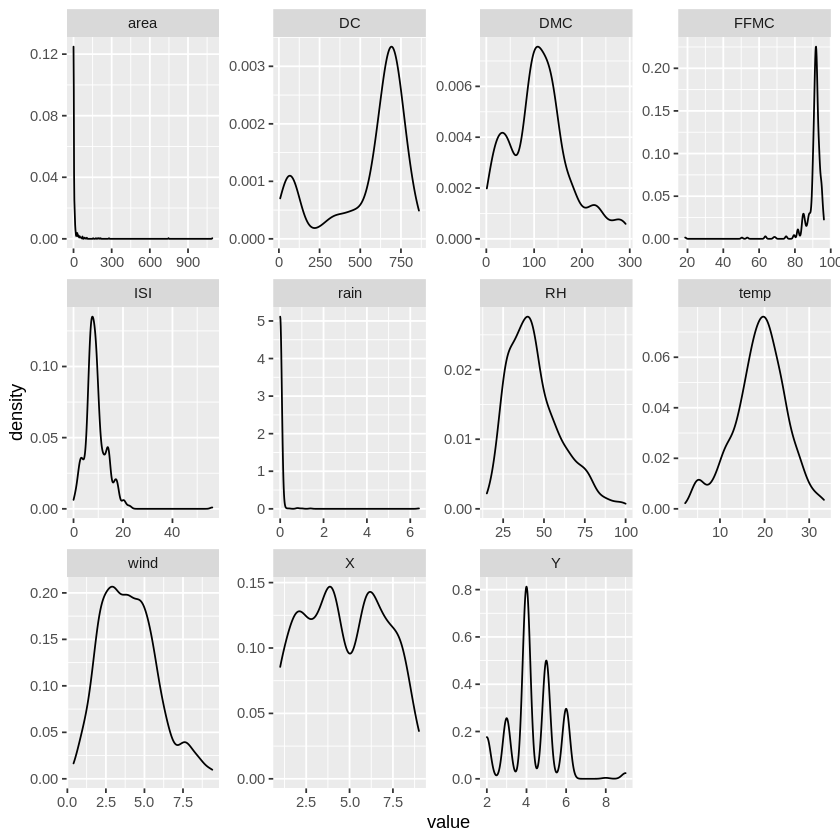

In [ ]:
# plot distribution of quantitative variables
df = keep(data, is.numeric)
df = gather(df)
ggplot(df, aes(value)) + facet_wrap(~key, scales="free") + geom_density()

As shown above, several variables show skewness and among them, area, ISI and rain show heavy positive skewness, meanwhile FFMC shows heavy negtive skewness. In order to improve regression results, transformations are applied to these variables. A log transformation is applied to reduce positive skewness and a cubic root transformation is applied to reduce negative skewness. Please note that 1 is added during a log transformation to prevent applying log on 0.

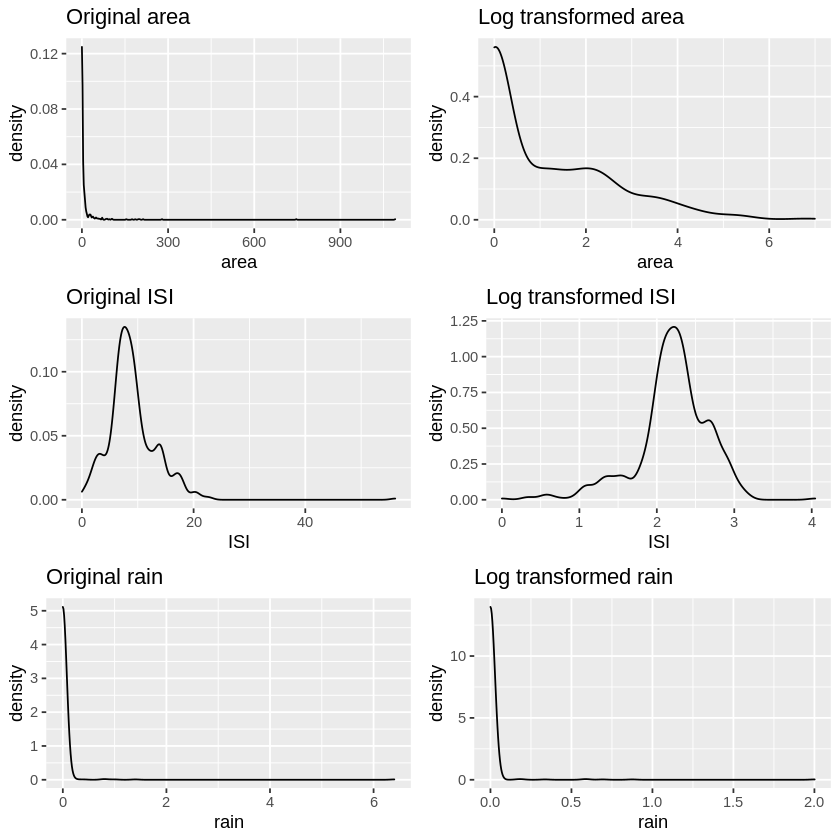

In [ ]:
# apply log transformations on area, ISI and rain
df = data
df$area = log(df$area+1)
df$ISI = log(df$ISI+1)
df$rain = log(df$rain+1)
# plot comparison
plot1 = ggplot(data, aes(x=area)) + geom_density() + 
ggtitle("Original area")
plot2 = ggplot(df, aes(x=area)) + geom_density() + 
ggtitle("Log transformed area")
plot3 = ggplot(data, aes(x=ISI)) + geom_density() + 
ggtitle("Original ISI")
plot4 = ggplot(df, aes(x=ISI)) + geom_density() + 
ggtitle("Log transformed ISI")
plot5 = ggplot(data, aes(x=rain)) + geom_density() + 
ggtitle("Original rain")
plot6 = ggplot(df, aes(x=rain)) + geom_density() + 
ggtitle("Log transformed rain")
grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, ncol=2)

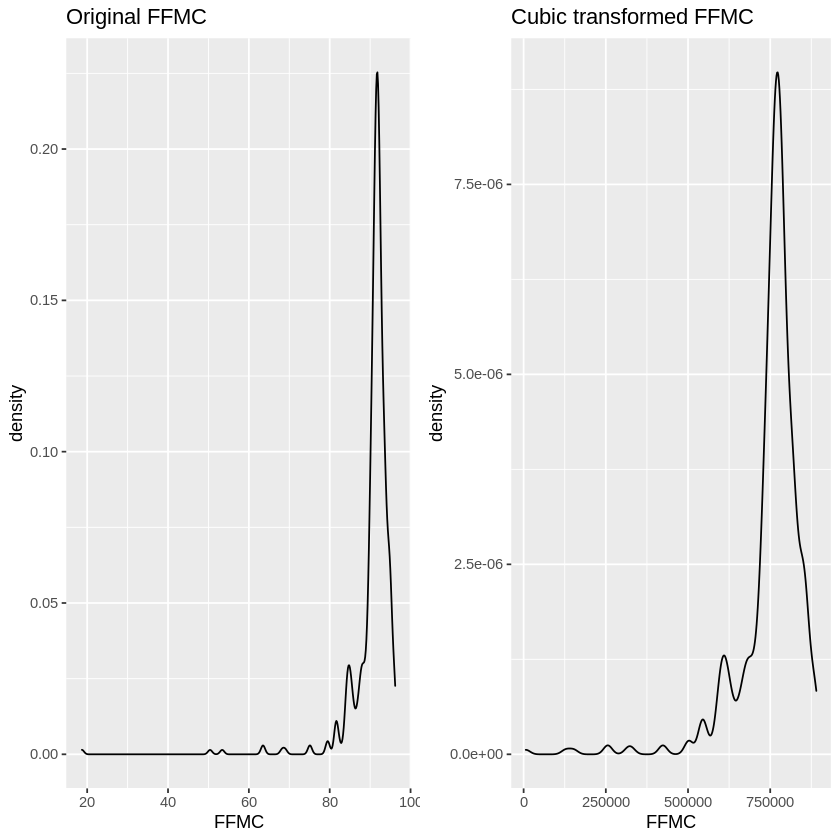

In [ ]:
# apply cubic transformation on FFMC
df$FFMC = (df$FFMC)^3
# plot comparison
plot1 = ggplot(data, aes(x=FFMC)) + geom_density() + 
ggtitle("Original FFMC")
plot2 = ggplot(df, aes(x=FFMC)) + geom_density() + 
ggtitle("Cubic transformed FFMC")
grid.arrange(plot1, plot2, ncol=2)

After log transformations, skewness of area and ISI have reduced, yet skewness of rain has not reduced to much extent. On the other hand, skewness of FFMC has eased slightly after a cubic transformation.

### 2.3. Correlations Between Quantitative Variables
Once, data transformations are applied on the target varible, correlations between quantitative variables are examined. 

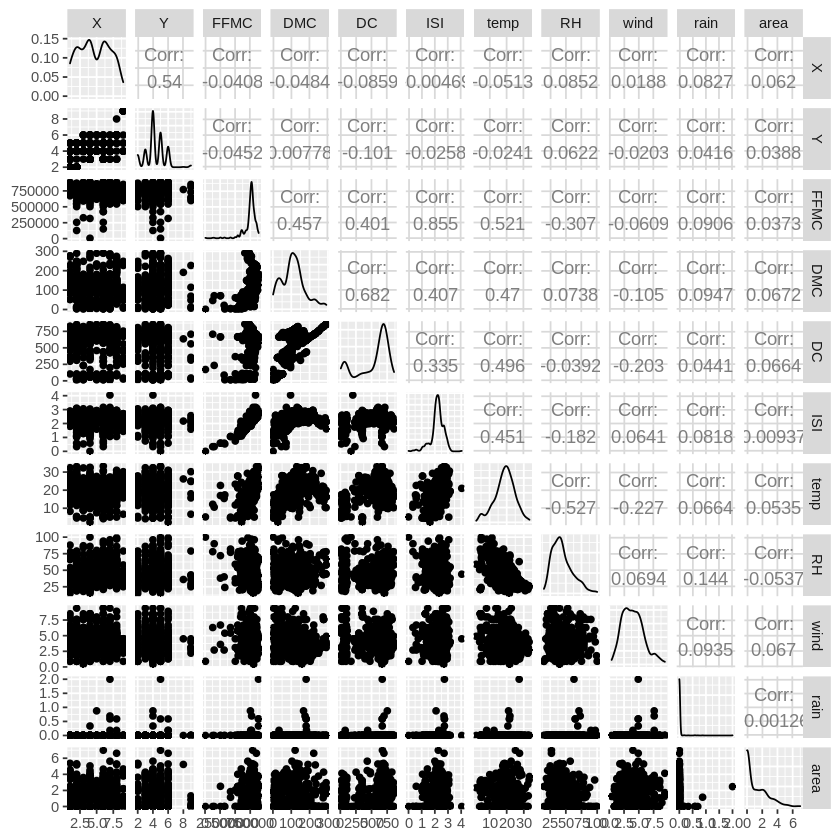

In [ ]:
# plot matrix scatter plot
ggpairs(keep(df, is.numeric))

In [ ]:
# rank correlations
cor_rank = as.data.frame.table(cor(keep(df,is.numeric)))
colnames(cor_rank) = c("var_1", "var_2", "cor")
cor_rank = cor_rank[cor_rank$var_1 != cor_rank$var_2, ]
cor_rank = cor_rank[order(abs(cor_rank$cor), decreasing = TRUE), ]
cor_rank = cor_rank[seq(1, nrow(cor_rank), 2), ]
cor_rank$cor = round(cor_rank$cor, 2)
rownames(cor_rank) = 1:nrow(cor_rank)
print(cor_rank[1:10,])

   var_1 var_2   cor
1    ISI  FFMC  0.85
2     DC   DMC  0.68
3      Y     X  0.54
4     RH  temp -0.53
5   temp  FFMC  0.52
6   temp    DC  0.50
7   temp   DMC  0.47
8    DMC  FFMC  0.46
9   temp   ISI  0.45
10   ISI   DMC  0.41


According to the matrix scatter plot and the correlation table, ISI and FFMC show the strongest positive correlation to other other, followed by DC and DMC and X and Y. On the other hand, RH and temp have a moderate negative correlation to each other. In overall, the forest Fire Weather Indexes show relations to each other and temperature is related to these indexes. <br>
Despite of a considerable correlation between spatial coordinates, X and Y, they may not have a meaning relation as the high correlation is likely due to nature of their similar and small ranges. (from 1 to 9 for X and from 2 to 9 for Y) And as illustrated below, they do not show a meaningful relation.


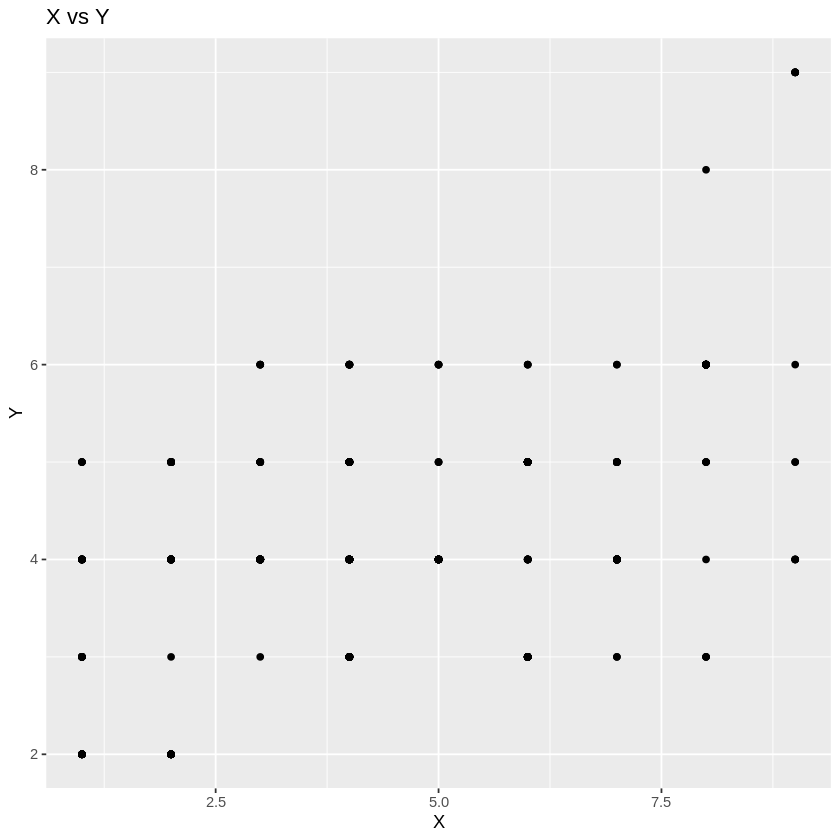

In [ ]:
# plot X against Y
ggplot(df, aes(x=X, y=Y)) + geom_point() + ggtitle("X vs Y")

### 2.4. Correlations of Qualitative Variables with Others
Now, correlations of the qualitative variables, Month and Day with other variables are investigated. To do this, box plots are used to show distributions of the quantitative variables over the qualitative variables.

In [ ]:
# melt the dataset for visualisation
df2 <- melt(as.data.frame(df))

Using month, day as id variables



#### Effect of Month on Other Variables

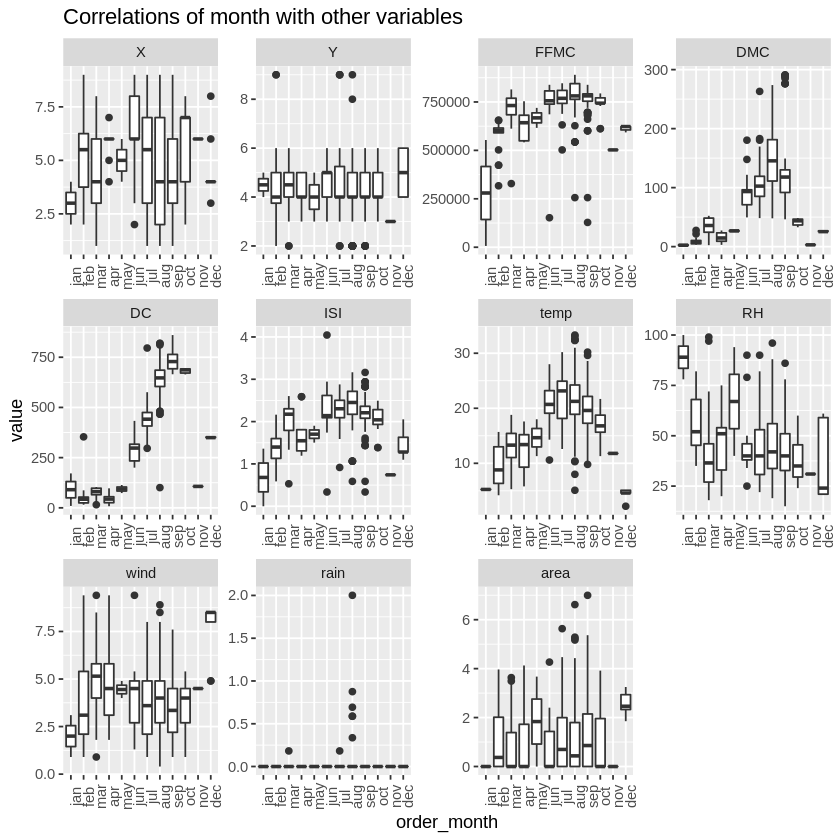

In [ ]:
# plot correlations of month with other variables
order_month <- factor(df2$month, level = c('jan','feb','mar','apr','may','jun',
                                        'jul','aug','sep','oct','nov','dec'))
ggplot(df2,aes(x = order_month,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)}) +
ggtitle("Correlations of month with other variables") +
theme(axis.text.x = element_text(angle = 90))

The plots imply that during the summer season (between June and mid-September), DMC, DC and temp show increased values compared to the other seasons. During the winter season (between December and February, ISI show lower values than the other months. <Br>
In January, FFMC and wind are considerably lower than the rest of the months and RH is considerably higher than the rest of the months. And in December, wind and area are significantly larger than values in other months. <br>
These relations show dependency on the seasons (months) as weather conditions are distinctively different in different seasons. 

#### Effect of Day of Other Variables

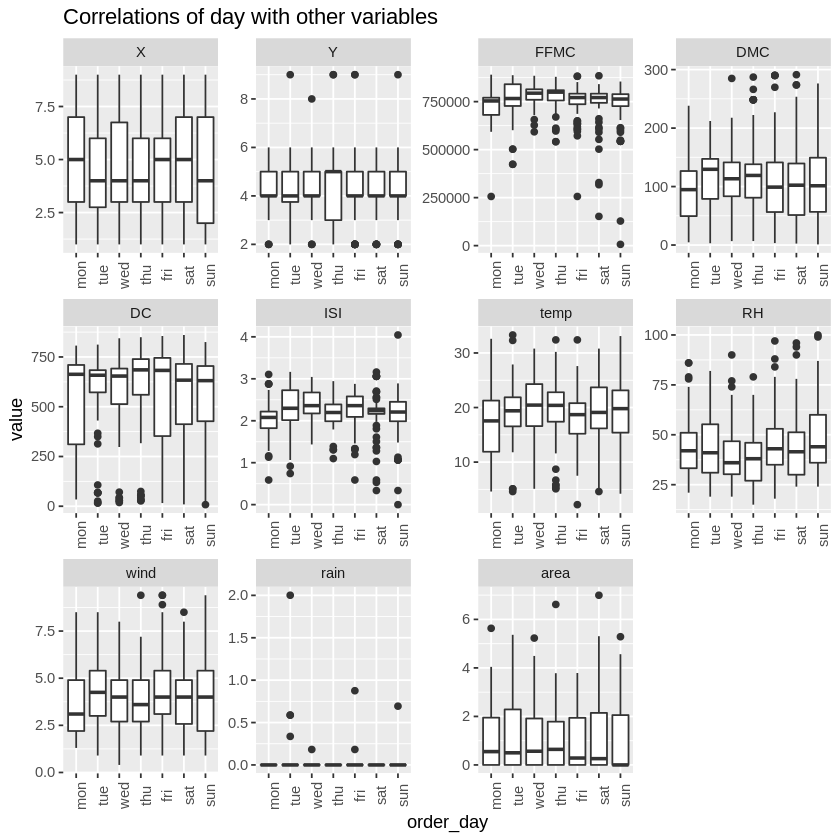

In [ ]:
# plot correlations of day with other variables
order_day <- factor(df2$day, level = c('mon','tue','wed','thu','fri',
                                        'sat','sun'))
ggplot(df2,aes(x = order_day,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)}) +
ggtitle("Correlations of day with other variables") +
theme(axis.text.x = element_text(angle = 90))

In terms of day, there seems to be no apparent correlations with other variables, where they show relatively similar values throughout different days. 

## 3. Model Development<a class="anchor" id="sec_3"></a>
Upon exploring the dataset, linear regression models are to be built to predict the burned area based on the predictor variables. In building regression models, the following approaches are taken to select predictor variables and train the models:

- Sequential Stepwise Regression
- Lasso Regression (L1 Regularisation)
- Ridge Regression (L2 Regularisation)

### 3.1. Standardisation & Dummy Coding
As shown in the exploration section, the independent and quantitative variables are in different scales. For better interpretation in terms of the regression coefficients, these independent and quantitative variables are standardised. <br>
Meanwhile, for qualitative variables, month and day, dummy coding is applied to convert into dichotomous variables.

In [ ]:
# standardise variables
df_stand = df
df_month_day_area = df_stand[c("month","day","area")]
df_stand$area = NULL
df_stand = scale(keep(df_stand, is.numeric))
df_stand = cbind(as.data.frame(df_stand), df_month_day_area)

# apply dummy coding
df_stand_dummy = as.data.frame(model.matrix(~.,df_stand))[, -1]

# view processed dataset
summary(df_stand_dummy)

       X                 Y                FFMC              DMC          
 Min.   :-1.5858   Min.   :-1.8699   Min.   :-7.5919   Min.   :-1.71395  
 1st Qu.:-0.7214   1st Qu.:-0.2438   1st Qu.:-0.1841   1st Qu.:-0.66003  
 Median :-0.2892   Median :-0.2438   Median : 0.1693   Median :-0.04016  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 1.0073   3rd Qu.: 0.5693   3rd Qu.: 0.5074   3rd Qu.: 0.49226  
 Max.   : 1.8717   Max.   : 3.8216   Max.   : 1.4088   Max.   : 2.81714  
       DC               ISI                temp                RH         
 Min.   :-2.1770   Min.   :-4.64157   Min.   :-2.87416   Min.   :-1.7949  
 1st Qu.:-0.4444   1st Qu.:-0.39828   1st Qu.:-0.58367   1st Qu.:-0.6918  
 Median : 0.4687   Median : 0.07726   Median : 0.07075   Median :-0.1402  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.6690   3rd Qu.: 0.55613   3rd Qu.: 0.67351   3rd Qu.: 0.5339  
 Max.   : 1.2604   Max.   : 3.87

After the standardisation and dummy coding, the independent and quantitative variables now have the same scales and the categorical variables are converted into dichotomous variables, expanding the number of independent variables to 27. 

### 3.2. Training - Test Split
Prior to building regression models, the dataset is firstly split into training and test datasets with a ratio of 80:20. caTools library is used to split the dataset.

In [ ]:
# split into training and test datasets
set.seed(1)
sample = sample.split(df_stand_dummy,SplitRatio = 0.80) 
train = subset(df_stand_dummy,sample ==TRUE)
test = subset(df_stand_dummy, sample==FALSE)

# size of training dataset and test dataset
cat("Size of training dataset")
dim(train)
cat("Size of test dataset")
dim(test)

Size of training dataset

[1] 406  28

Size of test dataset

[1] 111  28

### 3.3. Building Stepwise Regression
Stepwise regression finds the best subset of predictors by firstly fitting multiple models with the best predictors picked based on residual sum of squares (RSS). Then, the best model is selected amongst these fitted model using a validation method. <br>
In this project, sequential replacement, which is a combination of forward and backward stepwise selections, will be used to build linear models with best fitting predictors. Afterwards, various validation methods including Mallow's C$_P$, Bayesian Information Criterion (BIC), adjusted R$^2$ and residual sum of squares (RSS) are used to select the best model.

leaps package is used to build multiple linear models with different size up to 27 predictors. Sequential replacement approach is used to select the most relevant subset of predictors.

In [ ]:
# build stepwise regression models
step_model = regsubsets(area~., data = train, nvmax = 27, method = "seqrep")
step_summary = summary(step_model)
step_summary

Subset selection object
Call: regsubsets.formula(area ~ ., data = train, nvmax = 27, method = "seqrep")
27 Variables  (and intercept)
         Forced in Forced out
X            FALSE      FALSE
Y            FALSE      FALSE
FFMC         FALSE      FALSE
DMC          FALSE      FALSE
DC           FALSE      FALSE
ISI          FALSE      FALSE
temp         FALSE      FALSE
RH           FALSE      FALSE
wind         FALSE      FALSE
rain         FALSE      FALSE
monthaug     FALSE      FALSE
monthdec     FALSE      FALSE
monthfeb     FALSE      FALSE
monthjan     FALSE      FALSE
monthjul     FALSE      FALSE
monthjun     FALSE      FALSE
monthmar     FALSE      FALSE
monthmay     FALSE      FALSE
monthnov     FALSE      FALSE
monthoct     FALSE      FALSE
monthsep     FALSE      FALSE
daymon       FALSE      FALSE
daysat       FALSE      FALSE
daysun       FALSE      FALSE
daythu       FALSE      FALSE
daytue       FALSE      FALSE
daywed       FALSE      FALSE
1 subsets of each size up 

Linear models with numbers of predictors with ranging from 1 to 27 are selected. An asterisk indicates that a variable in the corresponding column is selected in the model. The best overall model is to be chosen based on the validation methods which are plotted below.

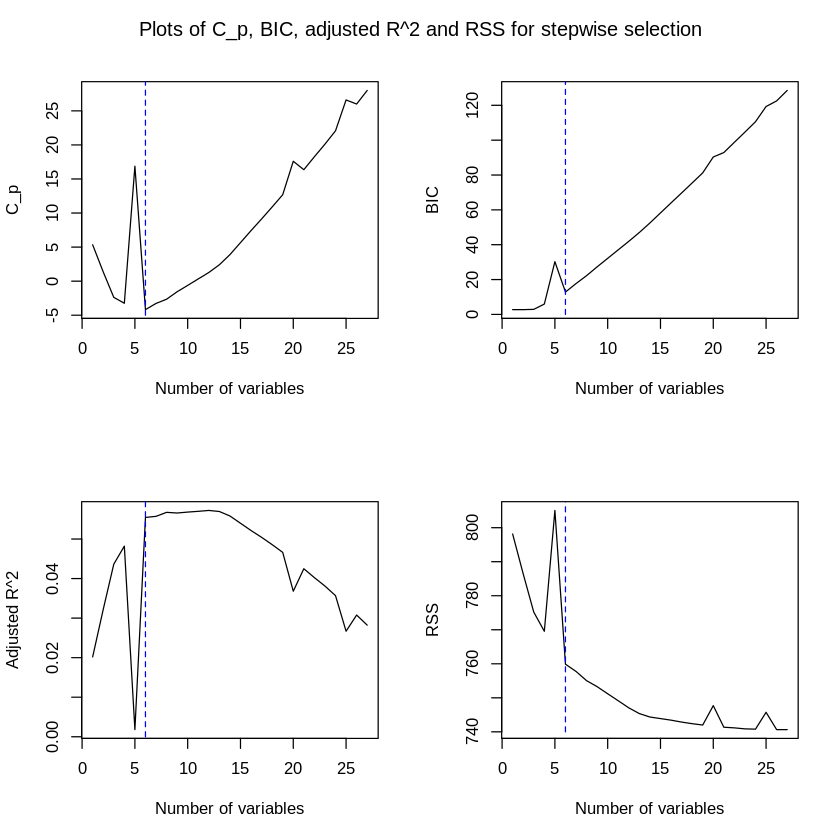

In [ ]:
# compare validation methods
par(mfrow = c(2, 2))

# plot C_p vs number of variables
plot(step_summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
lines(x=c(6,6), y=c(-5,30), col = "blue", type = "l", lty = 2)

# plot BIC vs number of variables
plot(step_summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
lines(x=c(6,6), y=c(0,140), col = "blue", type = "l", lty = 2)

# plot adjusted R^2 vs number of variables
plot(step_summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
lines(x=c(6,6), y=c(0,1), col = "blue", type = "l", lty = 2)
# plot RSS vs number of variables
plot(step_summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
lines(x=c(6,6), y=c(740,1000), col = "blue", type = "l", lty = 2)

# organise plots
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for stepwise selection", side = 3, line = -2, outer = TRUE)

Based on these validation methods, 6 predictors are seem to be the best in overall. As listed below, the selectec predictors are DMC, temp, wind, monthaug, monthdec and monthmar. monthdec shows that highest coefficient of 1.62, followed by monthaug with a coefficient of -0.499. wind shows the lowest coefficient of 0.148.


In [ ]:
# display coefficients of perdictors
coef(step_model, 6)

(Intercept)         DMC        temp        wind    monthaug    monthdec 
  1.3190117   0.1921039   0.1685002   0.1478767  -0.4991028   1.6244236 
   monthmar 
 -0.3615821

Once, a subset of the best predictors are selected, a linear regression model is built using these variables.

In [ ]:
# fit linear regression
fit_step = lm(area~DMC + temp + wind + monthaug + monthdec + monthmar, 
            data=train)

Lastly, normality of the residuals is checked to ensure the stepwise regression model obeys linear regression assumption.

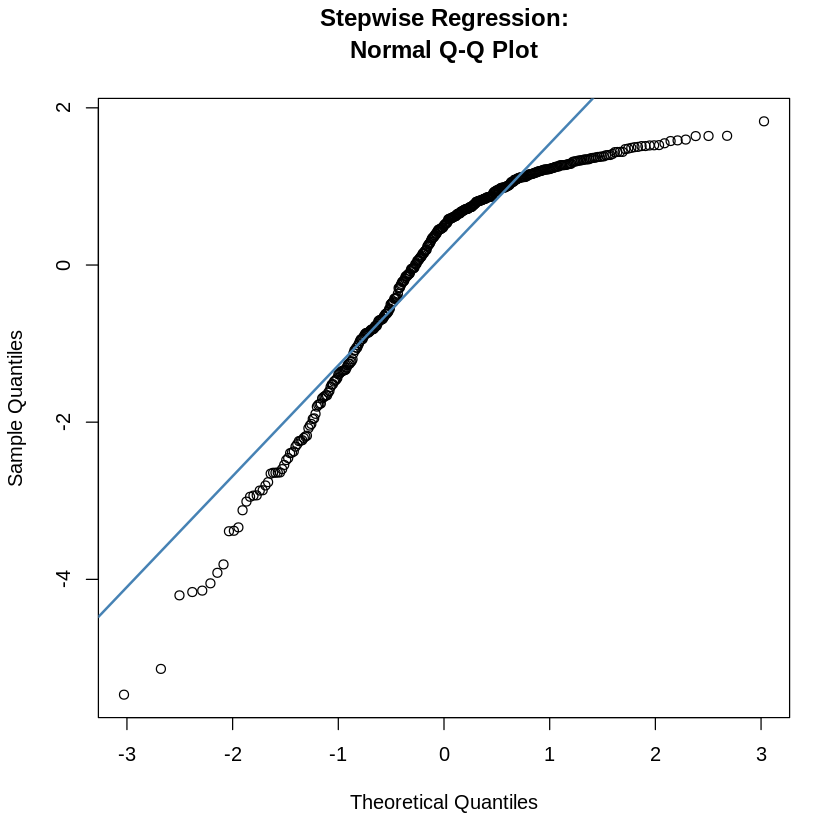

In [ ]:
pred_step = predict(fit_step, train)
res_step = pred_step - train$area
qqnorm(res_step)
qqline(res_step, col = "steelblue", lwd = 2)
title("Stepwise Regression:", line=3)

As illustrated above, most of the residuals fall approximately along the reference line, hence, normality of the model is assumed. 

### 3.4. Building Lasso Regression (L1 Regularisation)
In this section, a regression model will be developed using Lasso regression where it performs variable selection by shrinking variable coefficients. During the process, cross-validation will be used to determined the model with the least cross-validation errors. To achieve this, glmnet library will be used. <br>
Firstly, the training dataset is converted into a matrix model. And the tuning parameter, lambda is fit against mean squared errors using 5 fold cross-validation. For the cross-validation 5 folds are chosen as the size of the dataset is moderate.


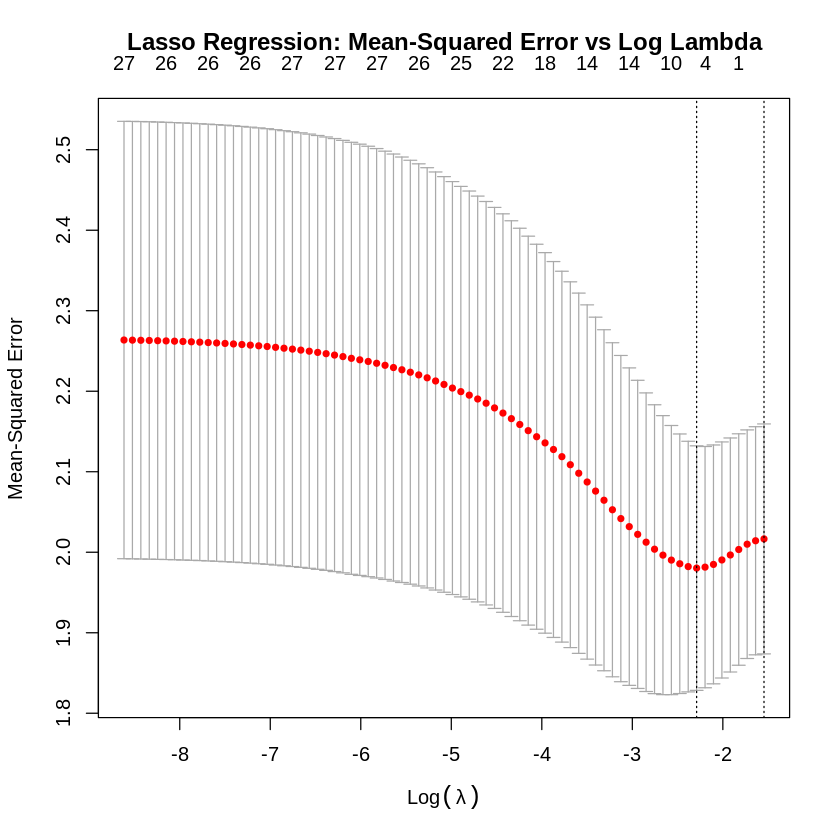

In [ ]:
# build a matrix model 
lasso_model = model.matrix(area~.,data=train)
lasso_model = lasso_model[, -1]
area = train$area

# fit lasso model on cross-validation 
cv_lasso = cv.glmnet(lasso_model, area, alpha=1, nfolds=5)

# plot cross-validation 
plot(cv_lasso)
title("Lasso Regression: Mean-Squared Error vs Log Lambda", line=2)

In [ ]:
# find the lambda with the lowest error
lasso_best_lam = cv_lasso$lambda.min
lasso_best_lam

[1] 0.1013095

Using the result from the cross-validation, the best lambda value of 0.101 is selected and the coefficients of variables are inspected.

(Intercept)           X           Y        FFMC         DMC          DC 
 1.10930014  0.00000000  0.00000000  0.00000000  0.02778587  0.00000000 
        ISI        temp          RH        wind        rain    monthaug 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
   monthdec    monthfeb    monthjan    monthjul    monthjun    monthmar 
 0.82625462  0.00000000  0.00000000  0.00000000  0.00000000 -0.08859688 
   monthmay    monthnov    monthoct    monthsep      daymon      daysat 
 0.00000000  0.00000000  0.00000000  0.10315216  0.00000000  0.00000000 
     daysun      daythu      daytue      daywed 
 0.00000000  0.00000000  0.00000000  0.00000000

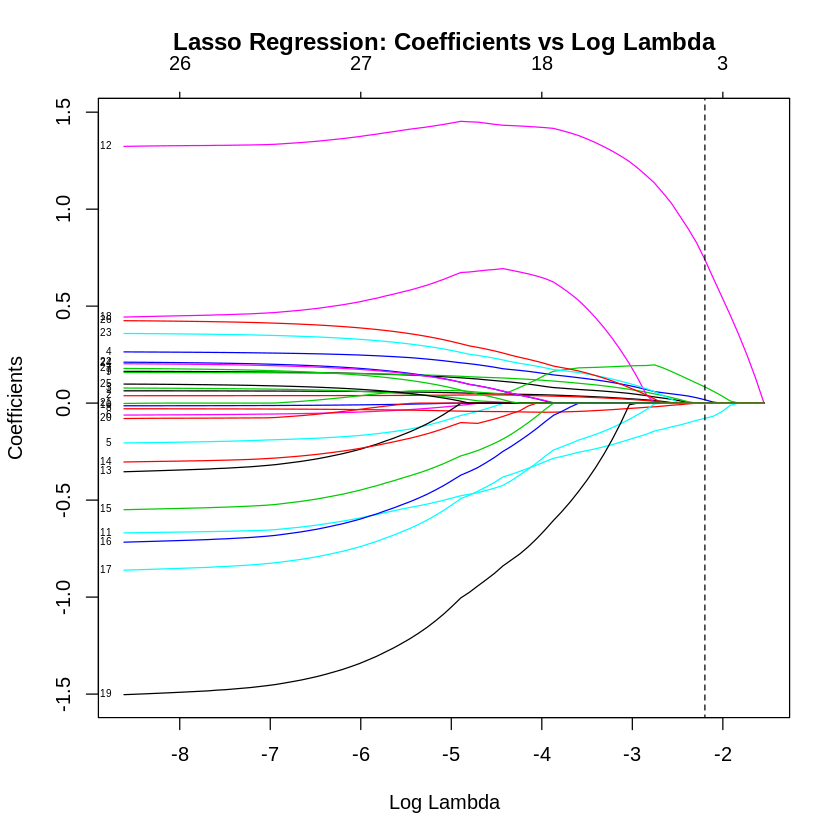

In [ ]:
# fit lasso regression and display variable coefficients 
fit_lasso = glmnet(lasso_model, area, alpha = 1)
plot(fit_lasso, xvar="lambda", label=T)
lines(x=c(log(0.111),log(0.111)), y=c(-10,10), type="l", lty=2)
title("Lasso Regression: Coefficients vs Log Lambda", line=2)
predict(fit_lasso, s = lasso_best_lam, type = "coefficients")[1:28, ]

The lasso regression model, with the selected lambda, contains 4 variables where 23 out of 27 variable coefficients are shruken down to zero. The selected variables are DMC, monthdec, monthmar and monthsep. monthdec has the largest coefficient of 0.738 and DMC has the smallest coefficient of 0.017. 

### 3.5. Building Ridge Regression (L2 Regularisation)
For ridge regression, a smiliar approach is taken as the lasso regression using glmnet library. <br>
The ridge regression tuning parameter, lambda is plotted against mean squared errors using cross-validation.
The tuning parameter, lambda is fit against mean squared errors using 5 fold cross-validation. For the cross-validation 5 folds are chosen as the size of the dataset is moderate.

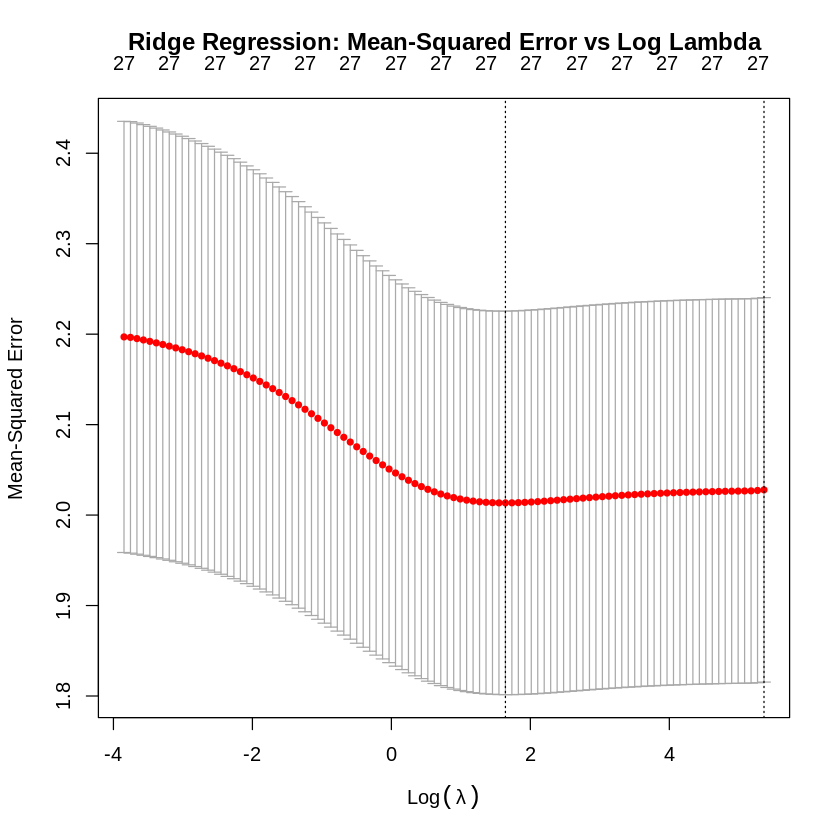

In [ ]:
# build a matrix model 
ridge_model = model.matrix(area~.,data=train)
ridge_model = ridge_model[, -1]
area = train$area

# fit ridge model on cross-validation 
cv_ridge = cv.glmnet(ridge_model, area, alpha=0, nfolds=5)

# plot cross-validation 
plot(cv_ridge)
title("Ridge Regression: Mean-Squared Error vs Log Lambda", line=2)

In [ ]:
# find the lambda with the lowest error
ridge_best_lam = cv_ridge$lambda.min
ridge_best_lam

[1] 5.160843

Using the result from the cross-validation, the best lambda value of 5.161 is selected and the coefficients of variables are inspected.

(Intercept)            X            Y         FFMC          DMC           DC 
 1.144508927  0.014251669  0.017349338  0.008660884  0.023059029  0.020149669 
         ISI         temp           RH         wind         rain     monthaug 
-0.001011387  0.012867818 -0.020757040  0.026832302  0.003284763 -0.043655185 
    monthdec     monthfeb     monthjan     monthjul     monthjun     monthmar 
 0.316206425 -0.034264091 -0.186851341 -0.003151435 -0.027081168 -0.100611707 
    monthmay     monthnov     monthoct     monthsep       daymon       daysat 
 0.168447817 -0.235933739 -0.020767126  0.056578568  0.005695301  0.045704693 
      daysun       daythu       daytue       daywed 
-0.005768123 -0.013238106  0.043470905 -0.010214279

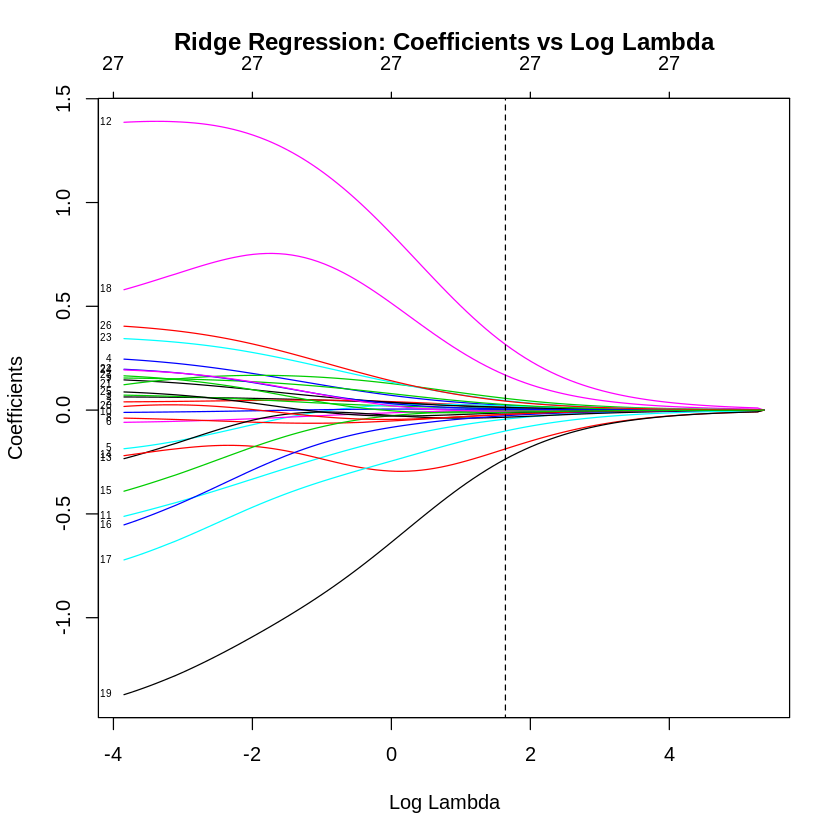

In [ ]:
# fit ridge regression and display variable coefficients 
fit_ridge = glmnet(ridge_model, area, alpha = 0)
plot(fit_ridge, xvar="lambda", label=T)
lines(x=c(log(5.161),log(5.161)), y=c(-10,10), type="l", lty=2)
title("Ridge Regression: Coefficients vs Log Lambda", line=2)
predict(fit_ridge, s = ridge_best_lam, type = "coefficients")[1:28, ] 

In comparison with the lasso regression model, none of the variables are shrunken down to zero. This is because, unlike the lasso model, the ridge model's penalty does not force any of the coefficient to be exactly zero. Hence, the ridge model has 27 predictors. monthdec has the highest coefficient of 0.316, while ISI has the lowest coefficient of -0.001.

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>
So far, three statistical models of stepwise regression, lasso regression and ridge regression are built. The prediction accuracy of these models are compared using statistical metrics including r-squared (R$^2$), root mean squared error(RMSE) and mean absolute error (MAE).

In [ ]:
# predictions
# stepwise regression
pred_step = predict(fit_step, test)
# lasso regression
test_mat = model.matrix(area~., data=test)[,-1]
pred_lasso = predict(fit_lasso, s=lasso_best_lam, newx=test_mat)
# ridge regression
pred_ridge = predict(fit_ridge, s=ridge_best_lam, newx=test_mat)

# display R^2, RMSE, MAE
r2 = c(R2(pred_step, test$area),R2(pred_lasso, test$area),
        R2(pred_ridge, test$area))
rmse = c(RMSE(pred_step, test$area),RMSE(pred_lasso, test$area),
        RMSE(pred_ridge, test$area))
mae = c(MAE(pred_step, test$area),MAE(pred_lasso, test$area),
        MAE(pred_ridge, test$area))        
df_error = data.frame("model"=c("Stepwise","Lasso","Ridge"),r2,rmse,mae)
df_error

model,r2,rmse,mae
<fct>,<dbl>,<dbl>,<dbl>
Stepwise,0.0010540794,1.369221,1.130813
Lasso,0.0001559244,1.319253,1.116928
Ridge,0.0002897791,1.322010,1.120485


As shown as above, the stepwise regression model is the least accurate with the highest statistical errors, while the lasso regression model is the most accurate with the lowest statistical errors. This shows that the regularisation methods (lasso & ridge) show higher accuracy than the subset selection method (stepwise). <br>
This is because, shrinkage of regression coefficients take place in regularisation which reduces variance of the model, increasing accuracy of the model. According to the coefficients depicted below, the coefficients of the lasso regression model and ridge regression model are much smaller than the coefficients of the stepwise regression model.<br>
In terms of regularisation methods, the lasso regression model shows better accuracy than the ridge regression model. And this is due to the difference in their shrinkage penalties. For ridge regression, the penalty never makes any of the coefficient to be exactly zero, meanwhile for lasso regression, the penalty makes coefficients zero at a large tuning parameter, lambda. As seen earlier, the ridge regression model has 27 predictors whereas the lasso regression model only has 4 predictors. Hence, the ridge regression model is likely to be influenced by the irrelevant predictors, limiting the accuracy of the model. <br>
In overall, the lasso regression model with 4 predictors of DMC, monthdec, monthmar, and monthsep is the best model amongst regression models. 


In [ ]:
# coefficients of models
cat("Coefficients of stepwise regression")
summary(fit_step)[4]
cat("\n---------------------------------\nCoefficients of lasso regression")
predict(fit_lasso, s = lasso_best_lam, type = "coefficients")[1:28, ] 
cat("\n---------------------------------\nCoefficients of ridge regression")
predict(fit_ridge, s = ridge_best_lam, type = "coefficients")[1:28, ] 

Coefficients of stepwise regression

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.3190117,0.09664088,13.648589,4.486792e-35
DMC,0.1921039,0.09126729,2.104849,3.592922e-02
temp,0.1685002,0.08591285,1.961292,5.054000e-02
wind,0.1478767,0.07499712,1.971765,4.932682e-02
monthaug,-0.4991028,0.16803830,-2.970173,3.156187e-03
monthdec,1.6244236,0.53100931,3.059124,2.369632e-03
monthmar,-0.3615821,0.27374337,-1.320880,1.872985e-01



---------------------------------
Coefficients of lasso regression

(Intercept)           X           Y        FFMC         DMC          DC 
 1.10930014  0.00000000  0.00000000  0.00000000  0.02778587  0.00000000 
        ISI        temp          RH        wind        rain    monthaug 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
   monthdec    monthfeb    monthjan    monthjul    monthjun    monthmar 
 0.82625462  0.00000000  0.00000000  0.00000000  0.00000000 -0.08859688 
   monthmay    monthnov    monthoct    monthsep      daymon      daysat 
 0.00000000  0.00000000  0.00000000  0.10315216  0.00000000  0.00000000 
     daysun      daythu      daytue      daywed 
 0.00000000  0.00000000  0.00000000  0.00000000


---------------------------------
Coefficients of ridge regression

(Intercept)            X            Y         FFMC          DMC           DC 
 1.144508927  0.014251669  0.017349338  0.008660884  0.023059029  0.020149669 
         ISI         temp           RH         wind         rain     monthaug 
-0.001011387  0.012867818 -0.020757040  0.026832302  0.003284763 -0.043655185 
    monthdec     monthfeb     monthjan     monthjul     monthjun     monthmar 
 0.316206425 -0.034264091 -0.186851341 -0.003151435 -0.027081168 -0.100611707 
    monthmay     monthnov     monthoct     monthsep       daymon       daysat 
 0.168447817 -0.235933739 -0.020767126  0.056578568  0.005695301  0.045704693 
      daysun       daythu       daytue       daywed 
-0.005768123 -0.013238106  0.043470905 -0.010214279

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>
Based on the lasso regression model selected, a subset of DMC, monthdec, monthmar and monthsep are deemed to be the most influential on the prediction of the burned area. By looking at their regression coefficients of:
- monthdec: 0.738
- monthsep: 0.083
- monthmar: -0.078
- DMC: 0.017

In comparing these month coefficients, December has the most influence on the burned area compared to September and March. In December, the predicted burned area would increase by 0.738 ha, whereas it would increase by 0.083 ha and decrease by 0.078 ha in September and March respectively. And for DMC, it only increases the predicted burned area by 0.017 ha when there is a unit increase of DMC. <br>

### 5.1. Correlations of Selected Variables with Burned Area
To further examine the selected variables' influence on the burned area, the correlations are revisited. 


In [ ]:
# rank correlations with burned area
cor_rank = as.data.frame.table(cor(df_stand_dummy))
colnames(cor_rank) = c("var_1", "var_2", "cor")
cor_rank = cor_rank[(cor_rank$var_1 == "area") | (cor_rank$var_2 == "area"), ]
cor_rank = cor_rank[cor_rank$var_1 != cor_rank$var_2, ]
cor_rank = cor_rank[order(abs(cor_rank$cor), decreasing = TRUE), ]
cor_rank = cor_rank[seq(1, nrow(cor_rank), 2), ]
cor_rank$cor = round(cor_rank$cor, 2)
rownames(cor_rank) = 1:nrow(cor_rank)
print(cor_rank[1:10,])

   var_1    var_2   cor
1   area monthdec  0.14
2   area monthmar -0.08
3   area monthsep  0.08
4   area      DMC  0.07
5   area     wind  0.07
6   area       DC  0.07
7   area        X  0.06
8   area       RH -0.05
9   area     temp  0.05
10  area monthjan -0.05


As depicted in the table above, the predictors, monthdec, monthsep and DMC show the highest positive correlations with the burned area. Meanwhile, monthmar shows the highest negative correlation with the burned area.

This is reasonable because in Portugal, September is in the summer season where high temperature and low rainfall contributes to increase in the burned area (World Climate Guide, n.d.). And March is at the end of the winder and heavy rainfall during the winter season accumulates moisture contents of the plants and soils which contributes to reduction in the burned area. Having said this, December shows the highest correlation with the burned area although it is in the winter season. According to the boxplots below, in December, the mean wind speed is the highest in comparison with other months. As wind speed is one of the major elements that propagates fire with supply of oxygen and increased speed of spread, it contributes to the burned area (CFA, n.d.). Lastly, DMC indicates the depth the fire will burn in moderate duff layers and medium sized woody material (Malaga Weather, n.d.). Thus, it has an influence on the burned area. 

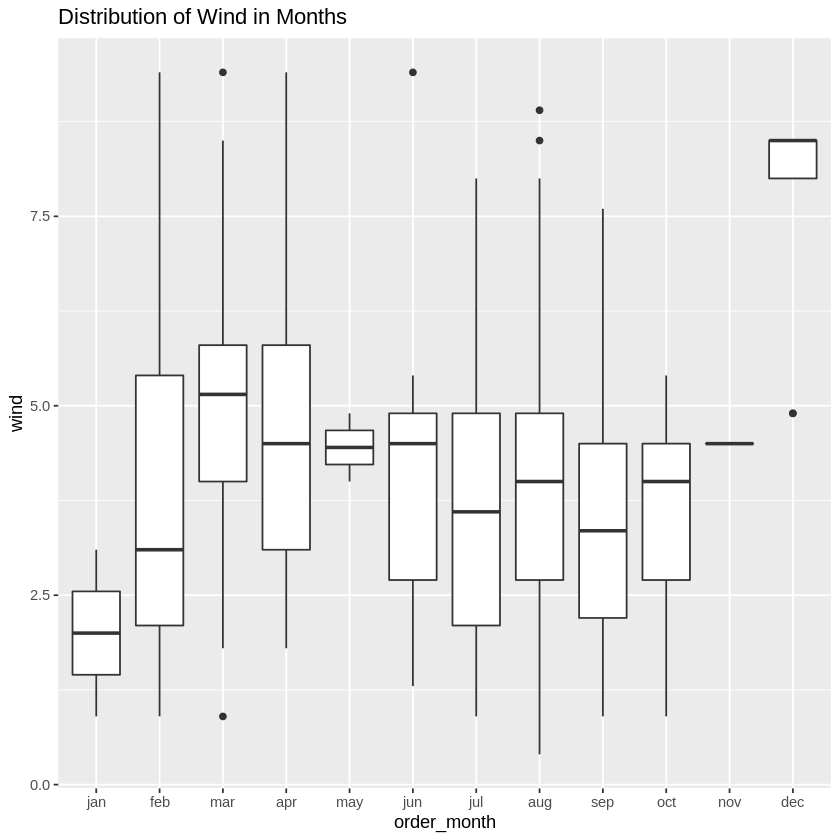

In [ ]:
# distribution of wind based on month
order_month <- factor(df$month, level = c('jan','feb','mar','apr','may','jun',
                                        'jul','aug','sep','oct','nov','dec'))
ggplot(df, aes(x=order_month, y=wind)) + geom_boxplot() +
    ggtitle("Distribution of Wind in Months")

### 5.2. Further Statistical Evidence 
By incorporating the selected variables into a linear regression, further statistical evidence is shown below. By looking at the F-statistic of 4.804 and p-value of 8.215e-4, the statistics show a strong edvidence against a null hypothesis of having no relationship between the predictor variables and the response variable.  

In [ ]:
# incorporate selected variables into linear regression 
fit_var = lm(area~DMC + monthdec + monthmar + monthsep, df_stand_dummy)
summary(fit_var)


Call:
lm(formula = area ~ DMC + monthdec + monthmar + monthsep, data = df_stand_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5553 -1.0633 -0.7190  0.8172  5.7208 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.01091    0.08293  12.190  < 2e-16 ***
DMC          0.10634    0.06801   1.564 0.118521    
monthdec     1.70148    0.47768   3.562 0.000403 ***
monthmar    -0.11161    0.22484  -0.496 0.619831    
monthsep     0.24694    0.13335   1.852 0.064624 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.378 on 512 degrees of freedom
Multiple R-squared:  0.03618,	Adjusted R-squared:  0.02865 
F-statistic: 4.804 on 4 and 512 DF,  p-value: 0.0008215


## 6. Conclusion <a class="anchor" id="sec_6"></a>
In this project, the forestfire dataset is explored and pre-processed to build three different statistical models of sequential stepwise regression model, lasso regression model and ridge regression model. The models are successfully developed through variable selections with different approaches. For the sequential stepwise regression model, 6 variables are selected and their coefficients are:

|Variable|Coefficient|
|--|--|
|Intercept|1.139|
|DMC|0.192|
|temp|0.169|
|wind|0.148|
|monthaug|-0.499|
|monthdec|1.624|
|monthmar|-0.362|

For the lasso regression model, 4 variables are chosen and their coefficients are shown in the table below.

|Variable|Coefficient|
|--|--|
|Intercept|1.117|
|DMC|0.017|
|monthdec|0.738|
|monthmar|-0.078|
|monthsep|0.083|

And lastly, the ridge regression model has 27 variables are selected and their coefficients are depicted as following:

|Variable|Coefficient|Variable|Coefficient|
|--|--|--|--|
|Intercept|1.14|FFMC|0.009|
|X|0.014|Y|0.017|
|DMC|0.023|rain|0.003|
|DC|0.02|ISI|-0.001|
|temp|0.013|RH|-0.021|
|wind|0.027|monthdec|0.316|
|monthaug|-0.044|monthoct|-0.021|
|monthfeb|-0.034|monthjan|-0.187|
|monthjul|-0.003|monthjun|-0.027|
|monthmar|-0.101|monthmay|0.168|
|monthnov|-0.236|daywed|-0.01|
|monthsep|0.0566|daymon|0.006|
|daysat|0.046|daysun|-0.006|
|daythu|-0.013|daytue|0.043|

By comparing the following statistical errors, the lasso regression model comes out to be the best overall model with the highest accuracy. 

|Model|R$^2$|RMSE|MAE|
|--|--|--|--|
|Stepwise|0.00105|1.369|1.131|
|Lasso|0.00021|1.319|1.118|
|Ridge|0.00029|1.322|1.120|

And a subset of variables that have the most significant influence on the prediction of the burned area is obtained through the lasso regression model. The subset of variables includes DMC, monthdec, monthmar and monthsep. These variables show the highest correlations with the burned area with statistical evidence. Besides the statistical evidence, their relationship is also explained by the seasonal weather in Portugal, where the dataset is originated from. 

## 7. References <a class="anchor" id="sec_7"></a>

Calma. J. (2020). What you need to know about the Australia bushfires. The Verge. Retrieved from: https://www.theverge.com/2020/1/3/21048891/australia-wildfires-koalas-climate-change-bushfires-deaths-animals-damage

Cortez. P. & Morais. A. (2007). A Data Mining Approach to Predict Forest Fires using Meteorological Data. University of Minho. Retrived from: https://www.researchgate.net/publication/238767143_A_Data_Mining_Approach_to_Predict_Forest_Fires_using_Meteorological_Data

World Climate Guide. (n.d.). Climates to Travel: Climate - Portugal. World Climate Guide. Retrieved from: https://www.climatestotravel.com/climate/portugal

CFA. (n.d.). How Fire Behaves. CFA. Retrieved from: https://www.cfa.vic.gov.au/plan-prepare/how-fire-behaves

Malaga Weather. (n.d.). Fire Weather. Malaga Weather. Retrieved from: https://www.malagaweather.com/fwi-txt.htm

EdM. (2017). Lasso regression coefficients values. Cross Validated. Retrieved from: https://stats.stackexchange.com/questions/269949/lasso-regression-coefficients-values
